<h1 align="center">Scraping e-commerce product page & Exploratory data analysis</h1> 
_______________________________________________________________________________________________________________________________


<h5 align="center">Luis Terán</h5> 

The aim of this project is to develop a tool for scraping an entire dataset of the products contained in an e-commerce website, transforming the web visualization into a well structured dataset. This tool should be able to scrape different products (for the same website) just by changing the word key (**wordKey variable**) defined in the beginning. 
The website used for this project is:

</br><center> https://www.newegg.com/global/mx-en/ </center>

(Consulted on September 5th 2020. Results may change according to date and products available for that date)

The process followed by the project was:
1. Definition of parameters: There are defined the website to scrape, the product to scrape and tools needed for it.
2. Page scraping: The important values are searched along a page of the website.
3. Complete dataset scraping: Search cycle of page scraping over the n number of pages available.
4. Handling unstructured data: The raw text found is transformed into the appropriate columns.
5. Data type definition: The columns are converted into their corresponding data type.
6. Exploratory data analysis: An analysis is made from the information obtained from the created process.

The results obtained from the presented project are the transformation of grid view of products.

- View grid of products:

<img src="images/toTransform2.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Grid view of products</p>

- Tidy dataset:

<img src="images/transformed.png" alt="Figure 2" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Structured dataset</p>

## 1. Definition of parameters

First, all the libraries needed for the project are loaded, the main job of scraping was made with the **Selenium** library. For the remaining process there are some variables that are needed, these values are:
- Keyword: The word key variable represents the product that will be searched in the website, for the case presented the word key is "monitor" so the dataset of products created will correspond to different models of monitors for sale in the website.
- URL: The selected page for scraping, in this case newegg page, the code for scrapig will change for every website. It could also change for different future changes in the source code of the website. The scraping was designed for the code in September 5th, 2020.
- Path: Is the designated path in the computer for the Chrome webdriver (requires previous download).

In [2]:
# Libraries needed
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re

In [2]:
# Product to search in the website
wordKey = 'monitor'
# Website to scrape
url = 'https://www.newegg.com/global/mx-en/'
# Location of web driver
path = 'C:\Program Files (x86)\chromedriver.exe'

## 2. Page Scraping

What is meant for page scraping is to collect all the data present in one page of the website. The steps for it are as follows:

- Open the web driving and search for the url defined in the parameter section

<img src="images/page.png" alt="Figure 3" style="width: 400px;"/><p style="text-align:center;font-size: 11px;">Page loaded in webdriver </p>
- Search for the product selected in the wordKey variable

<img src="images/searchBar.png" alt="Figure 4" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Search of the product</p>
- Get the source code of the page of the first page of results and start to scan the code for specific elements, in this case: Brand, price, rating, reviews and description.        
        
Since we only search in the first page, we only get the first 36 products.

In [4]:
# Setting the web driver
driver = webdriver.Chrome(path)
# The url is entered into the webdriver
driver.get(url)

# The search box is finded
search = driver.find_element_by_id("SearchBox2020")
# The word is entered into the search box
search.send_keys(wordKey)
search.send_keys(Keys.RETURN)

# The lists of elements to search for are created
titles = []
ratings = []
reviews = []
brands = []
prices = []
#The exception handling is made to avoid crashes
try:
    # The loading wait is defined before the search
    app = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "app"))
    )
    # The items source code is finded
    listed = app.find_element_by_class_name("list-wrap")  
    items = listed.find_elements_by_class_name("item-container")    
    
    #For every item present in the source code the code is scanned for the elements we are looking for
    for item in items:         
        title = item.find_element_by_class_name("item-title") 
        titles.append(title.text)
        review = item.find_element_by_class_name("item-rating") 
        reviews.append(review.text)
        rating = item.find_element_by_class_name("item-rating") 
        ratings.append(rating.get_attribute("title"))
        divbrand = item.find_element_by_class_name("item-branding") 
        abrand = divbrand.find_element_by_tag_name("a")
        brand = abrand.find_element_by_tag_name("img")
        brands.append(brand.get_attribute('title'))        
        price = item.find_element_by_xpath("./div[contains(@class, 'item-action')]/ul/li[contains(@class, 'price-current')]/strong")
        prices.append(price.text)        
finally:
    driver.quit()

# The webdriver is closed
driver.quit()

In [7]:
# A dataframe is created with the lists of elements 
df = pd.DataFrame(list(zip(brands, prices, ratings, reviews, titles)), columns=['Brand','Price', 'Rating', 'Reviews', 'Description'])
df.head(10)

,Brand,Price,Rating,Reviews,Description
0,ASUS,"4,233",Rating + 4,"(1,349)","ASUS TUF Gaming VG24VQ 24"" Full HD 1920 x 1080..."
1,ASUS,"3,787",Rating + 5,(76),"ASUS VG245H Black 24"" 1ms (GTG) Widescreen 2x ..."
2,GIGABYTE,"5,570",Rating + 5,(84),"GIGABYTE G27FC 27"" 165Hz 1080P Curved Gaming M..."
3,GIGABYTE,"5,570",Rating + 5,(44),"GIGABYTE G27F 27"" 144Hz 1080P Gaming Monitor, ..."
4,Acer America,"6,462",Rating + 4,(322),"Acer XG270HU omidpx 27"" 2K 2560 x 1440 1ms 144..."
5,GIGABYTE,"8,243",Rating + 4,(213),"GIGABYTE G32QC 32"" (Actual size 31.5"") WQHD 25..."
6,MSI,"4,010",Rating + 4,(158),"MSI Optix G24C 24"" (Actual size 23.6"") Full HD..."
7,BenQ,"2,673",Rating + 5,(14),"BenQ GL2480 24"" Full HD 1920 x 1080 1ms (GTG) ..."
8,ASUS,"8,912",Rating + 4,(147),"ASUS TUF GAMING VG27WQ 27"" WQHD 2560 x 1440 (2..."
9,Acer America,"2,852",Rating + 4,(132),"Acer Nitro Gaming Series VG220Q bmiix 22"" (21...."


In [8]:
# The number of elements is displayed as (# of rows, # of columns)
df.shape

(36, 5)

## 3. Complete dataset scraping 

Once we did the process for one page is time to repeat the process for the total number of pages in the results. In order to do that the "Page Scraping" section is encapsulated into a function for later iteration, in this function try-except handling exceptions were introduced for not available values for an item. The process goes like this:

- The page is loaded and the wordKey is entered into the search box just as before.
- Before the scan of elements for the dataset, the number of pages available for the product search is scanned from the bottom part of the page.
<img src="images/bottomPages.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Number of pages</p>
- Then the function for scanning information for all the items in the page gets executed (findObjects function).
- The next bottom is searched and clicked from the bottom section of the page.
<img src="images/bottomNext.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Next page button</p>
- These steps are repeated n number of times, being n the resulting of pages available - 1

In [13]:
# Setting the web driver
driver = webdriver.Chrome(path)
driver.get(url)

# The wordKey is searched
search = driver.find_element_by_id("SearchBox2020")
search.send_keys(wordKey)
search.send_keys(Keys.RETURN)

# The initial dataframe is created
df = pd.DataFrame() 

# Function to iterate the process of finding lists of elements
def findObjects (app):    
    titles = []
    ratings = []
    reviews = []
    brands = []
    prices = []
    
    listed = app.find_element_by_class_name("list-wrap")  
    items = listed.find_elements_by_class_name("item-container") 
    
    for item in items:
        try:
            title = item.find_element_by_class_name("item-title") 
            titles.append(title.text) 
        except:
            titles.append('NA')
        try:
            review = item.find_element_by_class_name("item-rating") 
            reviews.append(review.text)
        except NoSuchElementException:
            reviews.append(0)
        try:
            rating = item.find_element_by_class_name("item-rating") 
            ratings.append(rating.get_attribute("title"))
        except NoSuchElementException:
            ratings.append('NA')
        try:
            divbrand = item.find_element_by_class_name("item-branding") 
            abrand = divbrand.find_element_by_tag_name("a")
            brand = abrand.find_element_by_tag_name("img")
            brands.append(brand.get_attribute('title'))   
        except:
            brands.append('NA')
        try:
            path2 = "./div[contains(@class, 'item-action')]/ul/li[contains(@class, 'price-current')]/strong"
            price = item.find_element_by_xpath(path2)
            prices.append(price.text) 
        except:
            prices.append(0)
    
    data = list(zip(brands, prices, ratings, reviews, titles))
    dfTemp = pd.DataFrame(data, columns=['Brand','Price', 'Rating', 'Reviews', 'Description'])
    
    return (dfTemp)

# The search of lists is iterated n number of times, being n = number of pages - 1
try:
    app = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "app"))
    )    
    numPages = app.find_element_by_class_name("list-tool-pagination-text")
    numPages = (int(numPages.text.split('/')[1]))
    print (numPages)  
        
    time.sleep(5)
    #goToNextPage(driver)
    for i in range (numPages-1):
        time.sleep(10)
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "[title^='Next']"))).click()
        app = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, "app"))
        )    
        
        dfTemp = findObjects(app)
        df = df.append(dfTemp)
        time.sleep(10)

finally:
    driver.quit()
    
# The webdriver is closed    
driver.quit()

34


In [14]:
# The complete dataset is extracted from the page
df.head(20)

,Brand,Price,Rating,Reviews,Description
0,MSI,"5,706",Rating + 4,(9),"MSI Optix MAG270VC2 27"" Full HD 1920 x 1080 1m..."
1,SAMSUNG,"2,273",Rating + 4,(3),"SAMSUNG LS24F354FHNXZA 24"" (Actual size 23.5"")..."
2,Acer America,"4,565",Rating + 3,(36),"Acer ED322QR Pbmiipx 32"" (Actual size 31.5"") F..."
3,Acer America,"4,991",Rating + 3,(22),"Acer ED270R 27"" Black 1920 x 1080 Widescreen 1..."
4,Acer America,"2,301",Rating + 3,(18),"Acer KG221Q Abmix 22"" (Actual size 21.5"") 1ms ..."
5,BenQ,"10,427",Rating + 5,(16),"BenQ EW3270U 32"" (Actual size 31.5"") 3840 x 21..."
6,Acer America,"9,176",Rating + 4,(112),"Acer Predator XB1 XB241H bmipr 24"" Full HD 192..."
7,ViewSonic,"13,279",Rating + 5,(11),"ViewSonic ELITE XG270QG 27"" Quad HD 2560 x 144..."
8,MSI,"5,911",Rating + 5,(8),"MSI Optix G32C4 31.5"" 1920 x 1080 1 ms (MPRT) ..."
9,Acer America,"7,504",Rating + 5,(7),"Acer Nitro XZ322Q Pbmiiphx 31.5"" FULL HD 165Hz..."


In [15]:
# The resulting dataset contains 1174 products
df.shape

(1174, 5)

In [17]:
# The dataset is saved into a CSV file
df.to_csv("data.csv")

## 4. Handling unstructured data

After collecting all the data, we have created a file with all the products available in the page for the wordKey entered, but these information of the products is not in the appropriate format for the analysis. Most of the variable are in text format, and the description contains more information but it is in raw text.

In [14]:
# Data file loaded
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Brand,Price,Rating,Reviews,Description
0,0,MSI,"5,706",Rating + 4,(9),"MSI Optix MAG270VC2 27"" Full HD 1920 x 1080 1m..."
1,1,SAMSUNG,"2,273",Rating + 4,(3),"SAMSUNG LS24F354FHNXZA 24"" (Actual size 23.5"")..."
2,2,Acer America,"4,565",Rating + 3,(36),"Acer ED322QR Pbmiipx 32"" (Actual size 31.5"") F..."
3,3,Acer America,"4,991",Rating + 3,(22),"Acer ED270R 27"" Black 1920 x 1080 Widescreen 1..."
4,4,Acer America,"2,301",Rating + 3,(18),"Acer KG221Q Abmix 22"" (Actual size 21.5"") 1ms ..."


In [15]:
# Description of the products in raw format
for desc in (df['Description'][:3]):
    print ('- '+desc+'\n')

- MSI Optix MAG270VC2 27" Full HD 1920 x 1080 1ms (MPRT) / 4ms (GTG) 165 Hz HDMI, DisplayPort FreeSync (AMD Adaptive Sync) Curved Gaming Monitor

- SAMSUNG LS24F354FHNXZA 24" (Actual size 23.5") Full HD 1920 x 1080 4ms (GTG) VGA HDMI AMD FreeSync Flicker Free Technology Super Slim Design LED Backlit Gaming Monitor

- Acer ED322QR Pbmiipx 32" (Actual size 31.5") Full HD 1920 x 1080 4ms (GTG) 144Hz 2xHDMI DisplayPort Built-in Speakers AMD FreeSync Backlit LED Curved Gaming Monitor





First of all, we will extract the information from the raw data in the 'Description' column. Despite it's an unstructured dataset we can look for repetitive patterns just as shown below:

Sequence:

<center>[Brand] [Model] [size] [dimension] [Frequency] [HDMI|VGA|USB]</center></br>


- Brand: It's the first word of every description. It's a word with only upper and lower case letters with no numbers
- Model: It's one or multiple words following the brand. It's a sequence of words between the brand and the screen size. Also is an alphanumeric value/values.
- Screen size: It should be a number followed by a ("), (”) or ('') as reference for the units.
- Dimension: It is a two digit number followed by an (x) and another two digit number. There are some optional spaces in between them.
- Frequency: It should be a number just before a (Hz) written in upper case, lower case or a mix of them.
- HDMI: If the description contains the word HDMI
- VGA: If the description contains the word VGA
- USB: If the description contains the word USB

In [16]:
# Function that returns a pattern for every element in a list
def lookFor(elements, pattern, ifnot):
    # elements: List of elements where the pattern is going to be looked for (for every element)
    # pattern: Regex pattern to search in that list (elements)
    # ifnot: Fill element for cases where the pattern is not found
    patternList = []    
    for element in elements:
        try: 
            patternList.append(re.search(pattern, element).group(0))
        except:
            patternList.append(ifnot)
    return patternList

# Searching for the selected patterns in the Description column
df['Brand2'] = lookFor(df['Description'].values, '^[a-zA-Z]*', np.nan)
df['Model'] = lookFor(df['Description'].values, '\s.*?(?=(?:\\d{1,3}\\.?\\d{0,3}["|”|\'\'])|$)', np.nan)
df['Size'] = lookFor(df['Description'].values, '\\d{1,3}\\.?\\d{0,3}["|”|\'\']', np.nan)
df['Dimensions'] = lookFor(df['Description'].values, '[\d]*[\s?]x[\s?][\d]*', np.nan)
df['HDMI'] = lookFor(df['Description'].values, '[Hh][Dd][Mm][Ii]', 'No')
df['VGA'] = lookFor(df['Description'].values, '[Vv][Gg][Aa]', 'No')
df['USB'] = lookFor(df['Description'].values, '[UU][Ss][Bb]', 'No')

## 5. Data type definition

After the extraction of information from the Description column, there are still some changes to make to transform the data into the desired format: 

- Price: Remove all commas and change the data type to float
- Rating: Remove the string "Rating +" and change the data type to float
- Reviews: Remove commas and extract the text between parenthesis. Change the data type to float too
- Size: Remove ("), (”) or ('') to get only the inches length of the screen.
- Width, Height: Split the dimensions (number x number) into two different columns named width and height.
- HDMI: Replace HDMI/NAN to Yes/No depending if is a feature for the column.
- VGA: Replace VGA/NAN to Yes/No depending if is a feature for the column.
- USB: Replace USB/NAN to Yes/No depending if is a feature for the column.

In [17]:
df.head()

,Unnamed: 0,Brand,Price,Rating,Reviews,Description,Brand2,Model,Size,Dimensions,HDMI,VGA,USB
0,0,MSI,"5,706",Rating + 4,(9),"MSI Optix MAG270VC2 27"" Full HD 1920 x 1080 1m...",MSI,Optix MAG270VC2,"27""",1920 x 1080,HDMI,No,No
1,1,SAMSUNG,"2,273",Rating + 4,(3),"SAMSUNG LS24F354FHNXZA 24"" (Actual size 23.5"")...",SAMSUNG,LS24F354FHNXZA,"24""",1920 x 1080,HDMI,VGA,No
2,2,Acer America,"4,565",Rating + 3,(36),"Acer ED322QR Pbmiipx 32"" (Actual size 31.5"") F...",Acer,ED322QR Pbmiipx,"32""",1920 x 1080,HDMI,No,No
3,3,Acer America,"4,991",Rating + 3,(22),"Acer ED270R 27"" Black 1920 x 1080 Widescreen 1...",Acer,ED270R,"27""",1920 x 1080,HDMI,No,No
4,4,Acer America,"2,301",Rating + 3,(18),"Acer KG221Q Abmix 22"" (Actual size 21.5"") 1ms ...",Acer,KG221Q Abmix,"22""",1920 x 1080,HDMI,No,No


In [18]:
# Transforming the data into the desired format
df['Price'] = df['Price'].replace(',','', regex=True).astype(float)
df['Rating'] = df['Rating'].replace('Rating \+', '', regex=True).astype(float)
df['Reviews'] = (df['Reviews'].replace(',','', regex=True)
                              .replace('[(|)]', '', regex=True).astype(int))
df['Size'] = df['Size'].replace('["|”|\'\']','', regex=True).astype(float)
df[['Width', 'Height']] = df["Dimensions"].str.split("x", n = 1, expand = True) 
df['HDMI'] = df['HDMI'].replace('HDMI','Yes', regex=True)
df['VGA'] = df['VGA'].replace('VGA','Yes', regex=True)
df['USB'] = df['USB'].replace('USB','Yes', regex=True)
df = df[['Brand','Brand2','Model','Price','Rating','Reviews','Size','Width','Height','HDMI','VGA','USB','Description']]
df.head()

,Brand,Brand2,Model,Price,Rating,Reviews,Size,Width,Height,HDMI,VGA,USB,Description
0,MSI,MSI,Optix MAG270VC2,5706.0,4.0,9,27.0,1920,1080,Yes,No,No,"MSI Optix MAG270VC2 27"" Full HD 1920 x 1080 1m..."
1,SAMSUNG,SAMSUNG,LS24F354FHNXZA,2273.0,4.0,3,24.0,1920,1080,Yes,Yes,No,"SAMSUNG LS24F354FHNXZA 24"" (Actual size 23.5"")..."
2,Acer America,Acer,ED322QR Pbmiipx,4565.0,3.0,36,32.0,1920,1080,Yes,No,No,"Acer ED322QR Pbmiipx 32"" (Actual size 31.5"") F..."
3,Acer America,Acer,ED270R,4991.0,3.0,22,27.0,1920,1080,Yes,No,No,"Acer ED270R 27"" Black 1920 x 1080 Widescreen 1..."
4,Acer America,Acer,KG221Q Abmix,2301.0,3.0,18,22.0,1920,1080,Yes,No,No,"Acer KG221Q Abmix 22"" (Actual size 21.5"") 1ms ..."


In [19]:
# The tidy dataset is saved into a new file
df.to_csv("tidyData.csv", index=False)

## 6. Exploratory data analysis

For the analysis, the principal will be analyzed but we'll focus the most on a brand comparison of the top selling brands of monitors in the NewEgg e-commerce website. For the analysis we will study:
1. Price range of products
2. Price-rating relationship
3. Principal sizes of monitors
4. Top brands by offered products
5. Top brands' prices
6. Top brands' ratings

### 6.1 Price range of products

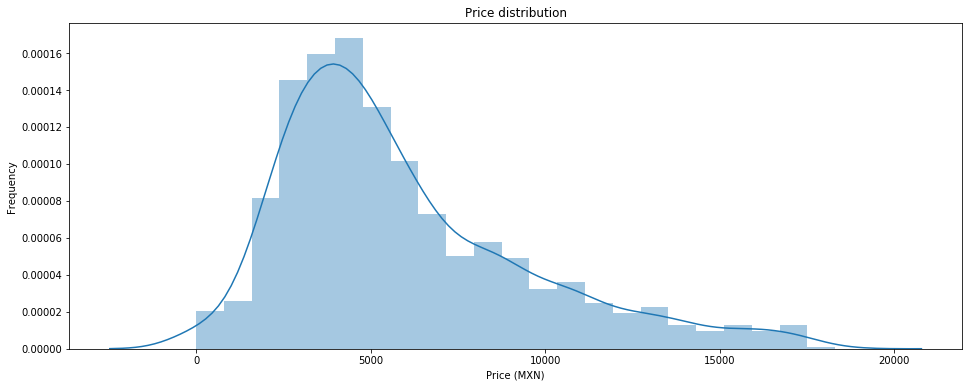

In [26]:
plt.figure(figsize=(16,6))
plt.title("Price distribution")
ax = sns.distplot(df['Price'])
ax.set(xlabel='Price (MXN)', ylabel='Frequency')
plt.show()

Just for a quick view, the distribution is skewed to the right. This is caused by the most expensive equipment, but we can see that the most frequent prices range from 4,000(MXN) and 5,000(MXN).

### 6.2 Price-rating relationship

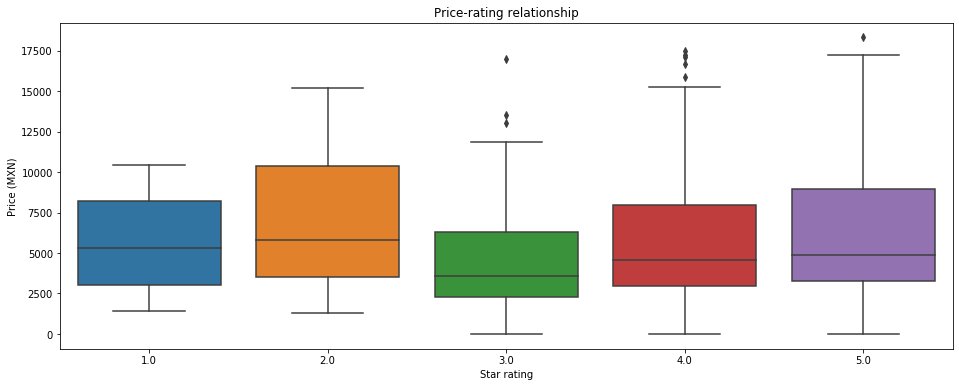

In [32]:
plt.figure(figsize=(16,6))
plt.title("Price-rating relationship")
ax = sns.boxplot(x="Rating", y="Price", data=df)
ax.set(xlabel='Star rating', ylabel='Price (MXN)')
plt.show()

Also a comparison is made between price and rating. Since we don't have an appropriate way of measuring the quality of the product, the rating and feedback from the users are an approximation to this. From the boxplot above, we can say that the 5 star rating can be found] in all range of prices but mainly from prices in the 2,500 (MXN) and 9,000 (MXN). Another important observations is that the two star rating is more frequent in higher prices than the 1 or 3 star ratings. As expected, the 1 star rating evaluation is found in lower prices, mostly prices bellow 8,000 (MXN). Despite these observations, there is no clear observable relation since all the boxes are not significantly different from each other.

### 6.3 Principal sizes of monitors

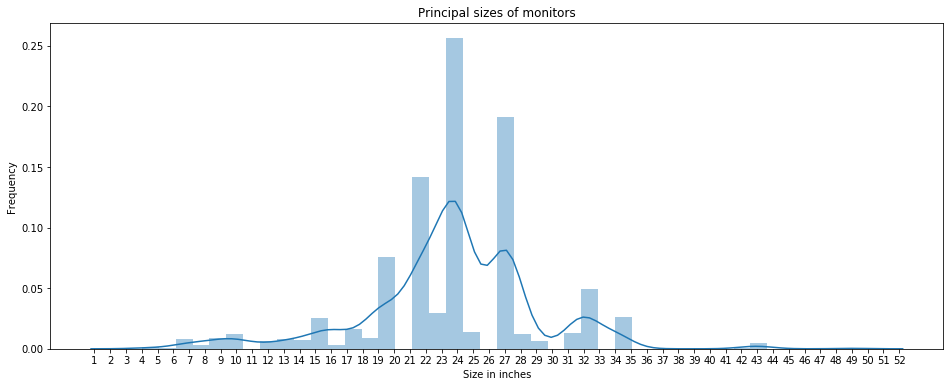

In [33]:
plt.figure(figsize=(16,6))
plt.title("Principal sizes of monitors")
g = sns.distplot(df[df['Size'].notnull()]['Size'])
g.set(xticks=range(1,53))
g.set(xlabel='Size in inches', ylabel='Frequency')
plt.show()

From the plot, we can state than the most frequent sizes in sale are 21.5", 24" and 27" monitors. Also we can see that there are no screen sizes of 11", 20.5", 26" and 30". Finally there are more variation in size in the small screen size than the bigger screen sizes. For the big screen size brand bet with the 44" screen size.

### 6.4 Top brands by offered products

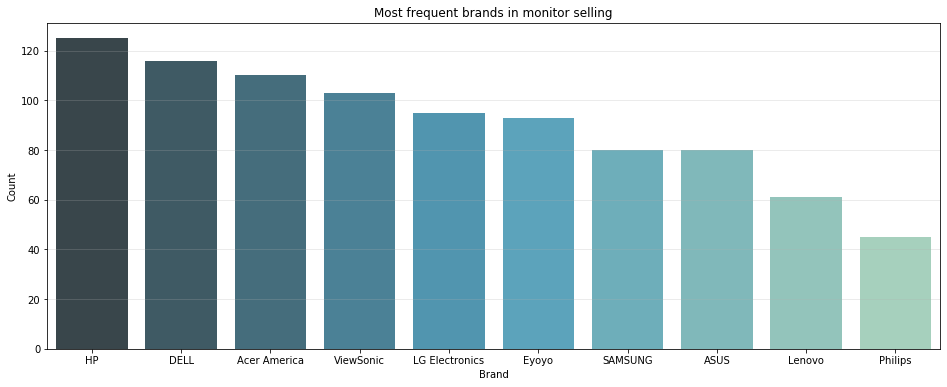

In [36]:
dfCount = pd.value_counts(df['Brand'].values, sort=True).head(10).to_frame()
dfCount.reset_index(inplace=True)
dfCount.columns = ['Brand', 'Count']
topBrands = dfCount['Brand'].values
plt.figure(figsize=(16,6))
plt.title("Most frequent brands in monitor selling")
plt.grid(alpha=0.3)
ax = sns.barplot(x="Brand", y="Count", data=dfCount, palette="GnBu_d")

Since there are a lot of different brands, we will focus on the most frequent brands in the dataset, this is the brands that have bigger number of models available in the market. As we see, these brands correspond to the bigger enterprise, but there are also new enterprises entering to the market, not as known as the others, that is the case of Eyoyo. HP has the biggest offer having almost the triple of tha last place that is Philips.

### 6.5 Top brands' prices

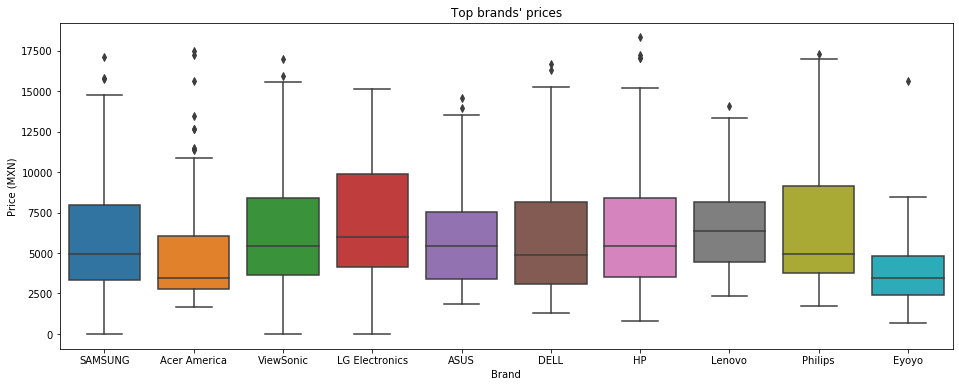

In [39]:
dfTop = df[df['Brand'].isin(list(topBrands))].copy()
plt.figure(figsize=(16,6))
plt.title("Top brands' prices")
ax = sns.boxplot(x="Brand", y="Price", data=dfTop)
ax.set(xlabel='Brand', ylabel='Price (MXN)')
plt.show()

Now we can get a better sense of the data by plotting the distribution of prices of the top brands found. We can see that Samsung, ViewSonic and Philips offer the most wide range of prices, being Philips a little bit more expensive than Samsung. Studying Eyoyo we can state that is a brand of cheaper equipment, also Acer offers a equipment with a low price but Eyoyo has the lowest prices. On the other hand, Philips and LG have the most espensive prices among them. We can state from the median position that at elast 50% of the total products' prices are lower than 6,000 (MXN).

### 6.6 Top brands' ratings

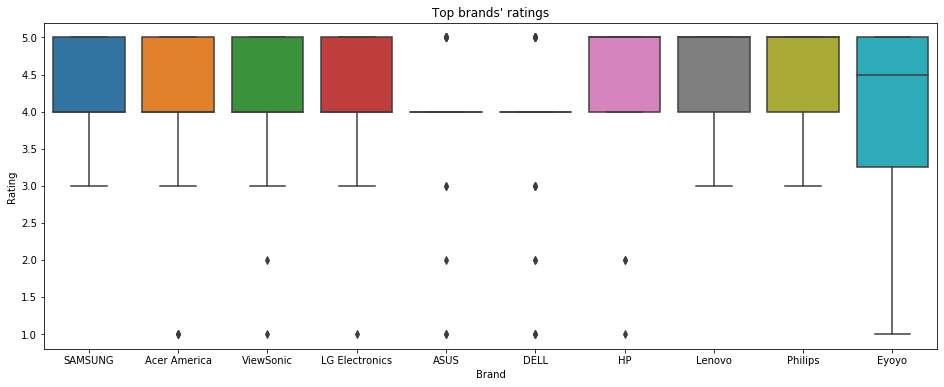

In [40]:
plt.figure(figsize=(16,6))
plt.title("Top brands' ratings")
ax = sns.boxplot(x="Brand", y="Rating", data=dfTop)

From the boxplot of prices, we can see that for most of the brands the rates range between 4 and 5 stars. The best rated brand is HP because most of the brands have their first percentile (25% of ratings) between 3 and 4 stars, meanwhile HP 100% of rates are between 4 and 5 rates. Also for ASUS ans DELL ratings, there are 100% rated with 4 star, that means that there only a few cases with 5 star ratings (showed as outliers in the plot). The worst rated brand is Eyoyo since 25% of their rates are below 3 stars, and more than 50% of the rates are not a 5 star rating, this is awful in comparison with the other brands.

## Conclusions

From all the analysis made above, we can state that:
1. The most frequent range of price for a monitor is between 4,000(MXN) and 5,000(MXN), with at least 50% of the products below 6,000(MXN).
2. For the high value monitors is more frequent the 5 rating meanwhile for lower price monitors are lower star ratings.
3. The most frequent screen sizes are 21.5", 24" and 27".
4. Establish the best brand is a complicated assignment, but we can have a better sense according to the price of the monitor.
    - For lower prices Eyoyo is not the best option, Acer it's a little bit more expensive but it totally makes up in the quality, as is shown in the ratings.
    - For average prices HP has the best satisfaction rating among all the brands in all places but the prices of the brand range are pretty average.
    - For higher prices Philips is the best option but not for a big difference, Philips was chosen because the absence of outlier low ratings.